![mobydick](mobydick.jpg)

In this workspace, you'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. You'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline you'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.

In [12]:
import requests

# Get the Moby Dick HTML  
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Set the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extract the HTML from the request object
html = r.text
print(html[0:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

In [13]:
from bs4 import BeautifulSoup
                                                
html_soup = BeautifulSoup(html, "html.parser") # Create a BeautifulSoup object from the HTML
moby_text = html_soup.get_text() # Get the text out of the soup


In [14]:
import nltk
from nltk.tokenize import RegexpTokenizer

# Create a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenize the text
tokens = tokenizer.tokenize(moby_text)

In [15]:
# Create a list called words containing all tokens transformed to lowercase
words = [token.lower() for token in tokens]

# Print out the first eight words
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

In [16]:
from nltk.corpus import stopwords

# Download the set of stop words the first time you run this
nltk.download('stopwords')
# Get the English stop words from nltk
stop_words = nltk.corpus.stopwords.words('english')

# Print out the first eight stop words
stop_words[:8]

# Create a list words_ns containing all words that are in words but not in stop_words
words_no_stop = [word for word in words if word not in stop_words]
# Print the first five words_no_stop to check that stop words are gone
words_no_stop[:5]

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['moby', 'dick', 'whale', 'herman', 'melville']

In [17]:
# Initialize a Counter object from our processed list of words
count = Counter(words_no_stop)

# Store ten most common words and their counts as top_ten
top_ten = count.most_common(10)

# Print the top ten words and their counts
print(top_ten)

[('whale', 1246), ('one', 925), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517), ('ye', 473), ('sea', 455), ('old', 452)]


In [21]:
from collections import Counter

word_freq = Counter(words_no_stop)
top_ten = word_freq.most_common(10)
print(top_ten)

# Print the top ten most common words and their frequencies
for word, freq in top_ten:
    print(f'{word}: {freq}')


[('whale', 1246), ('one', 925), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517), ('ye', 473), ('sea', 455), ('old', 452)]
whale: 1246
one: 925
like: 647
upon: 568
man: 527
ship: 519
ahab: 517
ye: 473
sea: 455
old: 452


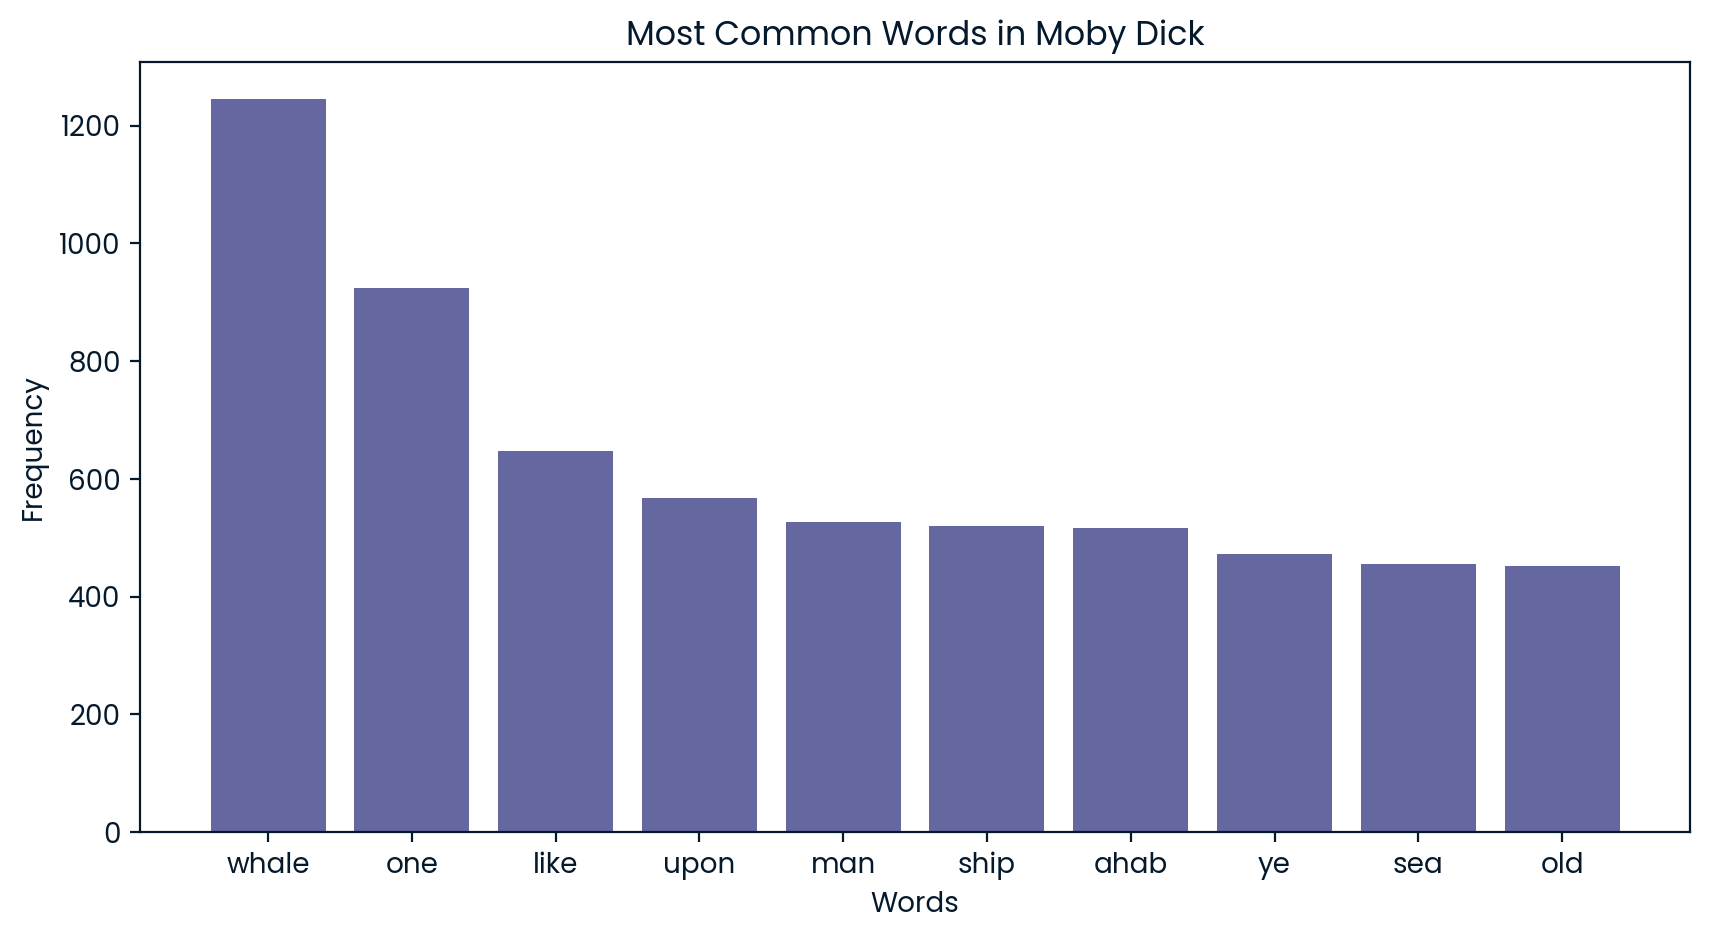

In [20]:
import matplotlib.pyplot as plt

# Extract words and their frequencies
words, frequencies = zip(*top_ten)

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Moby Dick')
plt.show()
